<a href="https://colab.research.google.com/github/MouryaPeddineni/machine_learning/blob/main/univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING ALL THE NECESSARY LIBRARIES**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

**MOUNTING GOOGLE DRIVE**

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*READING COMPANY DATASET AVAILABLE IN G-DRIVE.*

In [77]:
data = pd.read_csv("/content/gdrive/MyDrive/ML_datasets/Company_data.csv")

## **DATA EXPLORATION/ANALYSIS**





### CHECKING WHETHER DATA IS CLEAN OR NOT


In [78]:
#RETRIEVING NO.OF ROWS,NO.OF COLUMNS IN GIVEN DATASET.
data.shape

(200, 4)

In [79]:
#RETRIEVING ALL THE COLUMNS OF THE COMPANY DATASET.
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [80]:
#RETRIEVING TOP 5 RECORDS OF THE DATASET.
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [81]:
#RETRIEVING LAST 5 RECORDS OF THE DATASET.
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [82]:
#PRINTING INFORMATION ABOUT THE DATASET LIKE NUMBER OF NON-NULL VALUES FOR A COLUMN AND IT'S DATATYPE.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [83]:
#NUMBER OF NULL VALUES IN EACH COLUMN.
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [84]:
#CHECKING IF ANY RECORD IS DUPLICATE OR NOT,IF A RECORD IS FOUND DUPLICATE THEN REMOVE DUPLICATES USING drop_duplicates() METHOD.
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

# **DATA CLEANING**

*NO DATA CLEANING IS REQUIRED AS THE DATA DOESN'T CONTAIN ANY NULL VALUES AND DUPLICATE VALUES*  

dropna() method is used to remove null values present,if any.

drop_duplicates() method is used to remove all duplicate records present,if any.

In [85]:
data.drop_duplicates()
data.shape

(200, 4)

In [86]:
#SINCE NO RECORD IS FOUND DUPLICATE,NO RECORDS WERE DELETED AND SHAPE REMAINED UNAFFECTED.

# **DATA VISUALISATION**

### *BAR GRAPH*

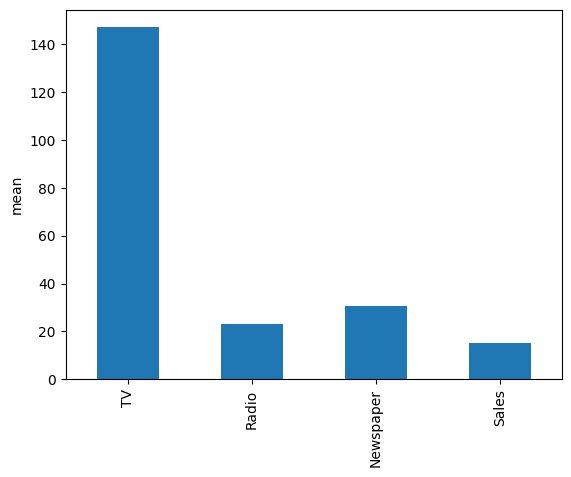

In [87]:
#PLOTTING A BAR GRAPH OF AVERAGE VALUES OF DIFFERENT PRODUCTS.
data.describe().loc['mean'].plot.bar()
plt.ylabel('mean')
plt.show()

### *HEAT MAP*

In [88]:
#FINDING THE CORRELATION OF THE DATASET USING corr() METHOD AND STORING THE CORRELATED DATA IN A VARIABLE correlated_data.
correlated_data = data.corr()

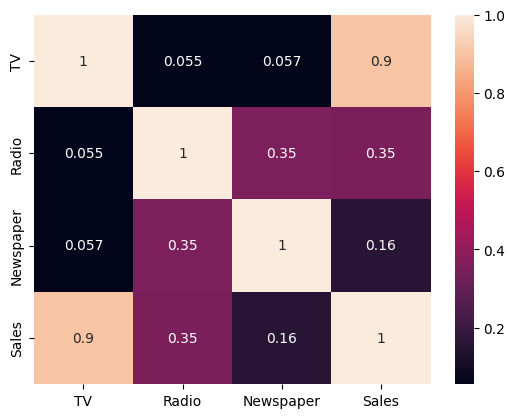

In [89]:
#PLOTTING A HEATMAP TO FIND WHICH INPUT VARIABLE HAS HIGHEST CORRELATION WITH RESPECT TO OUTPUT VARIABLE/LABEL.
#annot=True is used to show correlation b/w different x and y.
sn.heatmap(correlated_data,annot=True)
plt.show()

In [90]:
#HIGHLY CORRELATED INPUT VARIABLE TO LABEL IS CONSIDERED AS X_label.
X_label = data.iloc[:,0]

In [91]:
#RETRIEVING TOP 5 RECORDS OF THE X_label.
X_label.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [92]:
#LAST COLUMN IS CONSIDERED AS LABEL/OUTPUT VARIABLE.
Y_label = data.iloc[:,-1]

In [93]:
#RETRIEVING LAST 5 RECORDS OF THE Y_label.
Y_label.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

**SPLITTING THE COMPLETE DATASET INTO TRAIN AND TEST DATA**

In [94]:
#IMPORTING train_test_split for splittind the dataFrame into train and test datas.
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X_label,Y_label,test_size=0.3,random_state=0)

In [96]:
X_train.shape,X_test.shape

((140,), (60,))

*RESHAPING SO THAT MODEL CAN BE TRAINED.BECAUSE A MODEL CAN ONLY BE TRAINED USING 2 DIMENSIONAL DATA.*

In [97]:
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

# **FITTING THE MODEL**

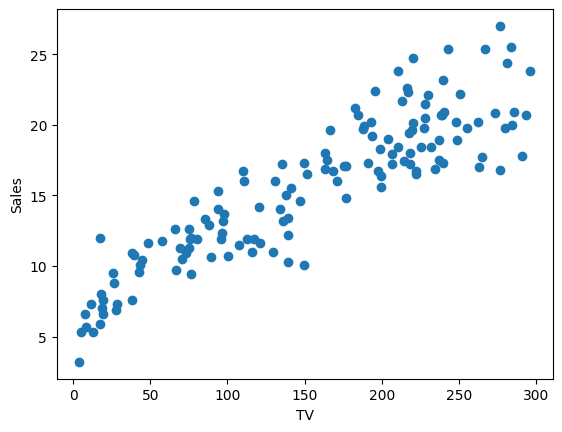

In [98]:
plt.scatter(X_train,Y_train)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [99]:
from sklearn import linear_model

In [100]:
#APPLYING LINEAR REGRESSION.
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

# **EVALUATION METRICS**

In [101]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

y_pred = reg.predict(X_train)

print(f'MAE = {mean_absolute_error(Y_train,y_pred)}')
print(f'MSE = {mean_squared_error(Y_train,y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_train,y_pred))}')
print(f'R_2 = {r2_score(Y_train,y_pred)}')

MAE = 1.81882800711975
MSE = 5.0779600089908765
RMSE = 2.253432938649579
R_2 = 0.805941153711277


In [102]:
prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)

## *PREDICTION FOR TRAINING DATA.*

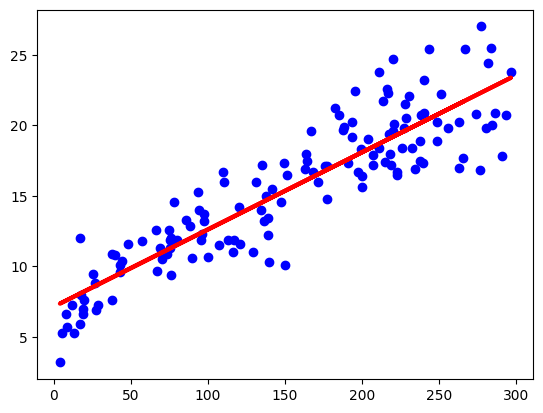

In [103]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,reg.predict(X_train),color='red',linewidth=3)
plt.show()

## *PREDICTION FOR TESTING DATA.*

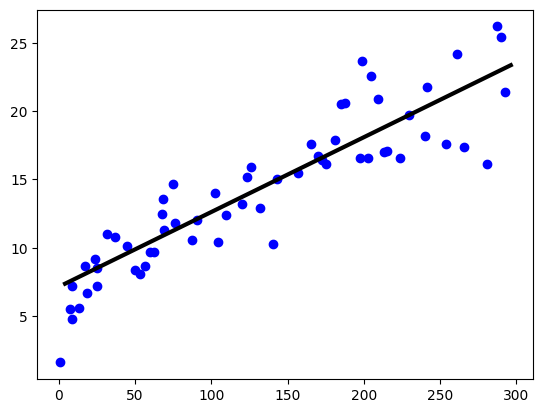

In [104]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()